In [2]:
"""
This notebook converts the coarse-grained structure (3x5) to fine structure (30x80).
"""
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys 
sys.path.append("../../tools/")
#module to handle mapping strings <-> arrays
from helper_functions import * 
#module to read and preprocess raw data
from preprocess import * 
from generate_lattice import * 

In [5]:
alldata_15G=np.loadtxt('../../mddata/15grid_shuffled.dat')
#dataset format 
#column 0 to column 14: cut configuration. '1' is for no cut and '0' is for cut 
#column 15: yield strain 
#column 16: toughness (up-to yield point)
#column 17: yield stress 
# 1 0 ... 1 0  0.5 0.7 80 
# 0 1 .... 0 1 0.7 0.9 100
# .

In [7]:
#paramters to make finer grids 
NCcell_x = 3
NCcell_y = 5
ncell_x = 34
ncell_y = 80

In [8]:
#create fine grids 
listFG=[]
for i in range (len(alldata_15G)):
    cutConfigurations=alldata_15G[i, 0:-3]
    inner = generateInnerCell(NCcell_x, NCcell_y, ncell_x, ncell_y)
    inner_wCuts = makeCutsonCell(cutConfigurations, inner, NCcell_x, NCcell_y, ncell_x, ncell_y)
    listFG.append(inner_wCuts)

alldata_FG = np.array(listFG)
alldata_FG = np.append(alldata_FG, alldata_15G[:, -3:], 1)
#the last three columns are yield strain, toughness, and yield stress. 
#just ignore the toughness

#the rest are TF, I will use the 15grid as an example here 
#alldata = alldata_15G
alldata = alldata_FG #unflag this for fine grid

nfeatures = len(alldata[0])-3 #nfeautures is needed later to split the matrix
print("Number of data:", len(alldata))
print("Number of features (or inputs/grids):", nfeatures)


#DON't shuffle, data is already pre-shuffled to make sure we have same test set for all models 
#np.random.shuffle(alldata)
x, y=create_matrix(alldata, False, 0, 0.375, nfeatures)
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data(x, y, 0.5, 0.1)


x, y=create_matrix(alldata, False, 2, 0.375, nfeatures)
#0 is STRAIN, 2 is STRESS not TOUGHNESS
X_train, X_valid, X_test, y_train2, y_valid2, y_test2 = split_data(x, y, 0.5, 0.1)


print (len(y_valid), len(y_test))


y_train = np.reshape(y_train, (len(y_train), 1))
y_valid = np.reshape(y_valid, (len(y_valid), 1))
y_test = np.reshape(y_test, (len(y_test), 1))

y_train2 = np.reshape(y_train2, (len(y_train2), 1))
y_valid2 = np.reshape(y_valid2, (len(y_valid2), 1))
y_test2 = np.reshape(y_test2, (len(y_test2), 1))

Number of data: 29791
Number of features (or inputs/grids): 2400
Number of good designs 12353 out of total 29791
Number of good designs 29791 out of total 29791
11916 2980


In [21]:
X_train.shape

(14895, 2400)

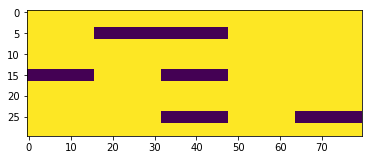

In [25]:
#Visualize  
h=30
w=80
plt.imshow(X_train[0].reshape([h, w]))
plt.show()

In [14]:
#calculate density 
density = np.zeros ((len(X_train), 1))
for i in range (len(X_train)):
    density [i]=(2400 - np.sum(X_train[i])/3/16)

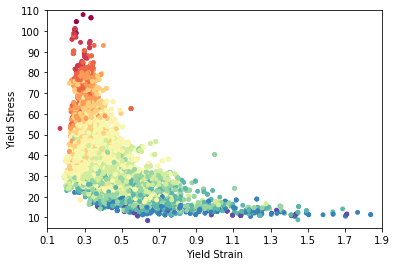

In [16]:
#Plot of training dataset 
plt.scatter(y_train, y_train2, c=density, cmap=plt.cm.Spectral, s=15)
plt.xlabel('Yield Strain')
plt.ylabel('Yield Stress')
plt.xlim([0.15, 1.5])
plt.xticks(np.arange(0.1, 2, step=0.2))
plt.ylim([5, 110])
plt.yticks(np.arange(10,120, step=10))
plt.show()